# 3. Polynomial Regression

### 공부 시간에 따른 시험 점수 (우등생)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X, y

(array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2],
        [2.4],
        [2.5],
        [2.6],
        [2.9],
        [3.1],
        [3.2],
        [3.3],
        [3.7],
        [3.9],
        [4. ],
        [4.1],
        [4.2],
        [4.4],
        [4.7],
        [4.8]]),
 array([  2,   4,   6,   4,   6,  14,  10,  12,  24,  26,  32,  46,  44,
         52,  58,  54,  68,  80,  84, 100], dtype=int64))

### 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # 전체 데이터로 학습

LinearRegression()

### 데이터 시각화 (전체)

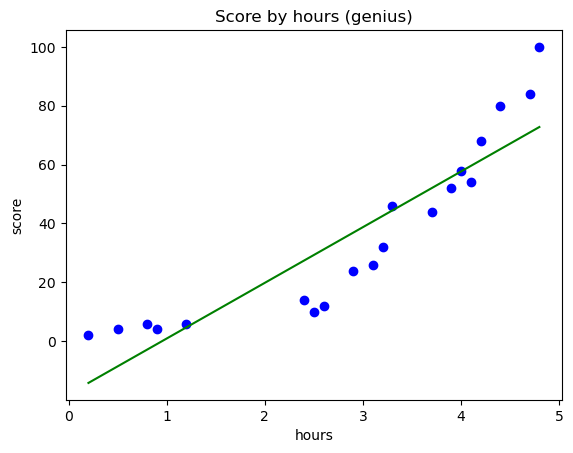

In [4]:
plt.scatter(X, y, c='b')
plt.plot(X, reg.predict(X), c='g')
plt.title('Score by hours (genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [5]:
reg.score(X, y)

0.8169296513411765

### 3-2. 다항 회귀 (Polynomial Regression)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # 4차 다항식 (제곱 들어간 다항식) 만들어줌 (1차->과소적합, 10차->과대적합)
X_poly = poly_reg.fit_transform(X)
X[:5], X_poly[:5], poly_reg.get_feature_names_out() # X_poly: [X] -> [X^0, X^1, X^2] / [3] -> [1, 3, 9]로 변환!

(array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2]]),
 array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
        [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
        [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
        [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
        [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]]),
 array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object))

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환된 X와 y의 전체 데이터로 학습

LinearRegression()

### 데이터 시각화 (변환된 X와 y)

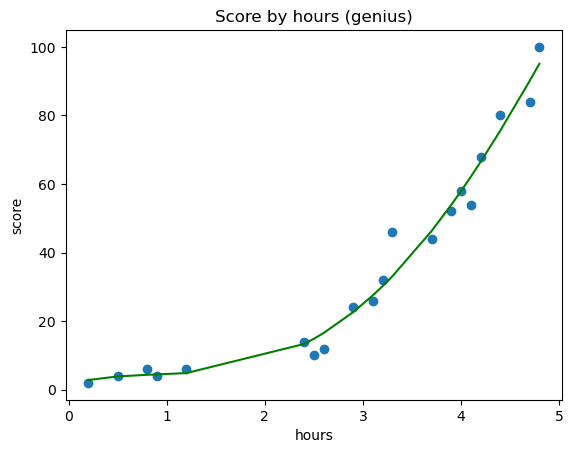

In [8]:
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), c='g')
plt.title('Score by hours (genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [9]:
X_range = np.arange(min(X), max(X), 0.01) # X의 최솟값에서 최댓값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range[:5], X[:5], X_range.shape, X.shape # X_range는 1차원 배열, X는 2차원 배열 상태 => X_range를 2차원 배열로 맞춰줘야 사용 가능

(array([0.2 , 0.21, 0.22, 0.23, 0.24]),
 array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2]]),
 (460,),
 (20, 1))

In [10]:
X_range = X_range.reshape(-1, 1) # row 개수는 자동으로 계산, column 개수는 1개
X_range[:5], X_range.shape

(array([[0.2 ],
        [0.21],
        [0.22],
        [0.23],
        [0.24]]),
 (460, 1))

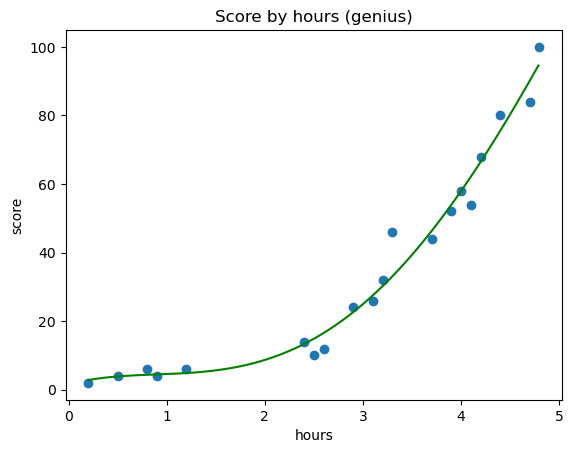

In [11]:
plt.scatter(X, y)
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), c='g')
plt.title('Score by hours (genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [12]:
reg.predict([[2]]) # 2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [25]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 다항 회귀 모델의 예측

array([8.70559135])

### 모델 간 점수 비교

In [20]:
reg.score(X, y) # 단순 선형 회귀 모델의 점수

0.8169296513411765

In [24]:
lin_reg.score(poly_reg.fit_transform(X), y) # 다항 회귀 모델의 점수

0.9782775579000045